In [1]:
import scipy.stats as sts 
import numpy as np 
import matplotlib.pyplot as plt

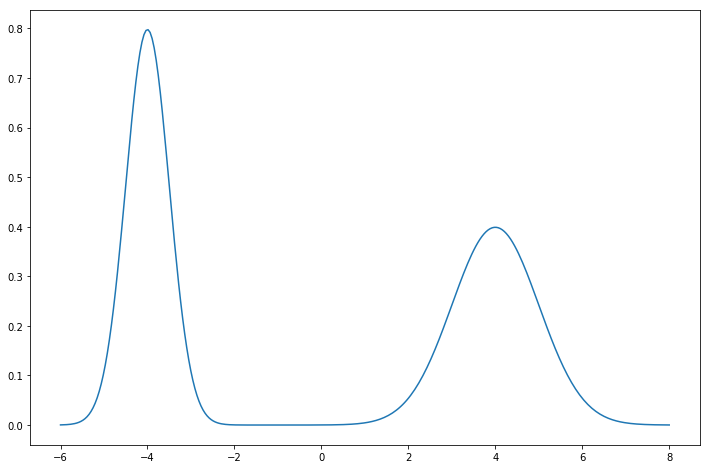

In [3]:
def unormalized_pdf(x): 
    return sts.norm.pdf(x, -4, 0.5) + sts.norm.pdf(x, 4, 1)

x = np.linspace(-6,8,300)
y = [unormalized_pdf(_) for _ in x]

plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.show()

In [95]:
def MH_MC(e, x_0, n=1000): 
    samples = [x_0]
#     y_sam = [unormalized_pdf(x_0)*sts.norm.pdf(x_0, x_0, e)]
    for i in range(n): 
        x = sts.norm(x_0, e).rvs()
        r = float(unormalized_pdf(x)/unormalized_pdf(x_0))
        if r >= 1: 
            samples.append(x)
#             y_sam.append(unormalized_pdf(x)*sts.norm.pdf(x, x_0, e))
            x_0 = x
        else: 
            dumb = sts.uniform.rvs()
            if r >= dumb: 
                samples.append(x)
#                 y_sam.append(unormalized_pdf(x)*sts.norm.pdf(x, x_0, e))
                x_0 = x
            elif r < dumb: 
#                 samples.append(x)
#                 y_sam.append(unormalized_pdf(x)*sts.norm.pdf(x, x_0, e))
                x_0 = x_0
    return samples


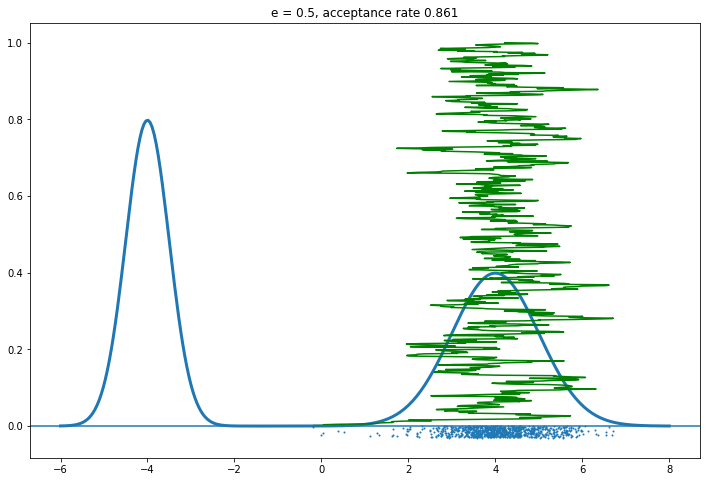

Correlation: 0.014491837477363939


In [82]:
samples = MH_MC(0.5, 0)
y_sam = np.linspace(0,1,len(samples))

plt.figure(figsize=(12,8))
plt.plot(x, y, linewidth=3)
plt.plot(samples, y_sam, color='g')
plt.axhline(y=0)
plt.scatter(samples, [-0.03 * sts.uniform.rvs() for _ in range(len(samples))], s=1)
plt.title('e = 0.5, acceptance rate {}'.format(float(len(samples)/1000)))
plt.show()
mat = np.concatenate((np.array(samples).reshape(-1,1), np.array(y_sam).reshape(-1,1)), axis=1).T
print('Correlation:', np.cov(mat)[0, 1])

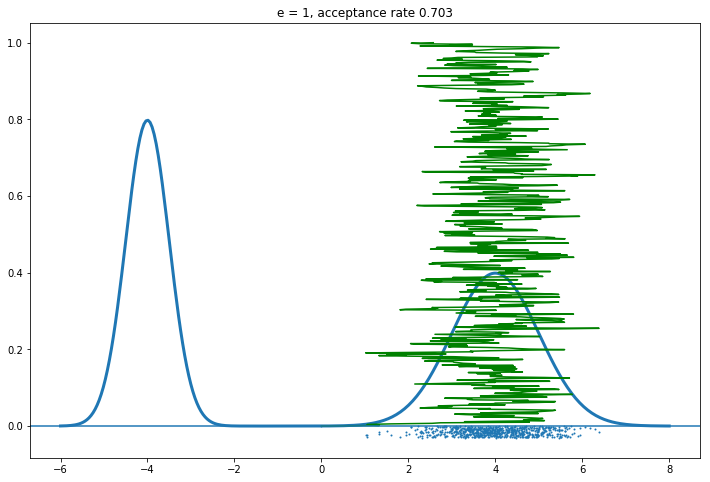

Correlation: 0.013594726873610023


In [103]:
samples = MH_MC(1, 0)
y_sam = np.linspace(0,1,len(samples))

plt.figure(figsize=(12,8))
plt.plot(x, y, linewidth=3)
plt.plot(samples, y_sam, color='g')
plt.axhline(y=0)
plt.scatter(samples, [-0.03 * sts.uniform.rvs() for _ in range(len(samples))], s=1)
plt.title('e = 1, acceptance rate {}'.format(float(len(samples)/1000)))
plt.show()
mat = np.concatenate((np.array(samples).reshape(-1,1), np.array(y_sam).reshape(-1,1)), axis=1).T
print('Correlation:', np.cov(mat)[0, 1])

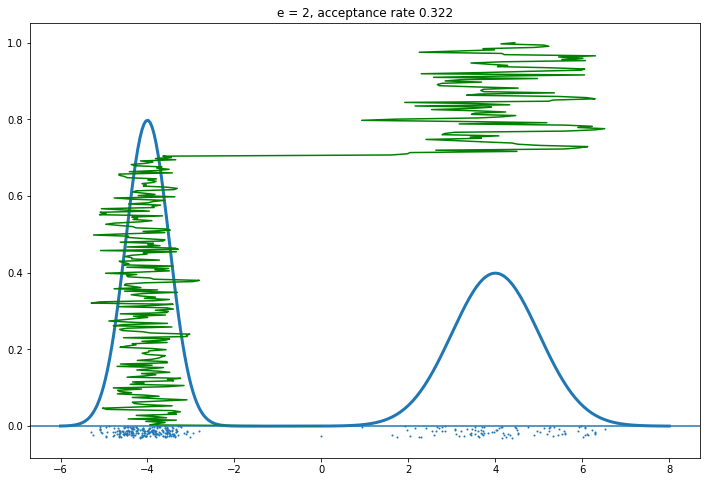

Correlation: 0.8466157642592428


In [100]:
samples = MH_MC(2, 0)
y_sam = np.linspace(0,1,len(samples))

plt.figure(figsize=(12,8))
plt.plot(x, y, linewidth=3)
plt.plot(samples, y_sam, color='g')
plt.axhline(y=0)
plt.scatter(samples, [-0.03 * sts.uniform.rvs() for _ in range(len(samples))], s=1)
plt.title('e = 2, acceptance rate {}'.format(float(len(samples)/1000)))
plt.show()
mat = np.concatenate((np.array(samples).reshape(-1,1), np.array(y_sam).reshape(-1,1)), axis=1).T
print('Correlation:', np.cov(mat)[0, 1])

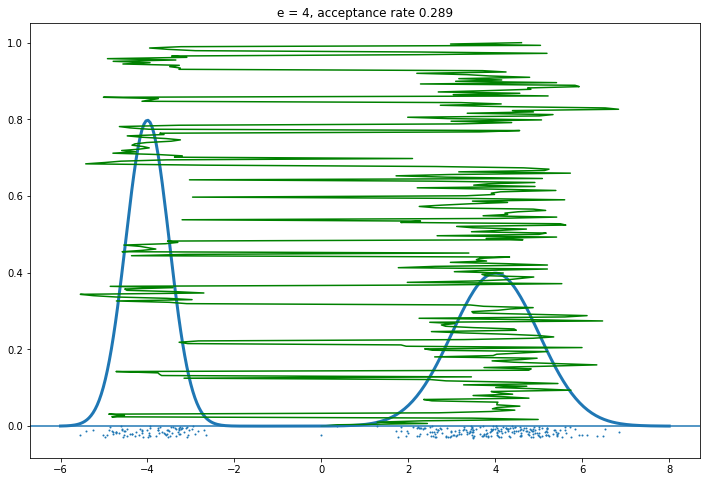

Correlation: -0.204882384539712


In [81]:
samples = MH_MC(4, 0)
y_sam = np.linspace(0,1,len(samples))

plt.figure(figsize=(12,8))
plt.plot(x, y, linewidth=3)
plt.plot(samples, y_sam, color='g')
plt.axhline(y=0)
plt.scatter(samples, [-0.03 * sts.uniform.rvs() for _ in range(len(samples))], s=1)
plt.title('e = 4, acceptance rate {}'.format(float(len(samples)/1000)))
plt.show()
mat = np.concatenate((np.array(samples).reshape(-1,1), np.array(y_sam).reshape(-1,1)), axis=1).T
print('Correlation:', np.cov(mat)[0, 1])

If e is too small the random walk will hardly ever escape a mode of the unormalized distribution, but if e is too large then it would take more step to get the same amount of sample, and more step to make the samples less correlated. The sweet spot for this scenario might be between 1 and 2. 

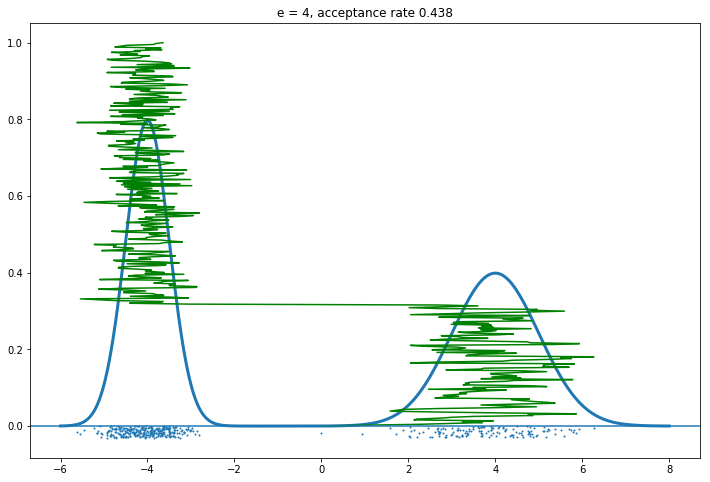

Correlation: -0.8510731798918942


In [107]:
samples = MH_MC(1.5, 0)
y_sam = np.linspace(0,1,len(samples))

plt.figure(figsize=(12,8))
plt.plot(x, y, linewidth=3)
plt.plot(samples, y_sam, color='g')
plt.axhline(y=0)
plt.scatter(samples, [-0.03 * sts.uniform.rvs() for _ in range(len(samples))], s=1)
plt.title('e = 4, acceptance rate {}'.format(float(len(samples)/1000)))
plt.show()
mat = np.concatenate((np.array(samples).reshape(-1,1), np.array(y_sam).reshape(-1,1)), axis=1).T
print('Correlation:', np.cov(mat)[0, 1])

In [149]:
def MH_MC_2(x_0, n=1000): 
    samples = [x_0]
    for i in range(n): 
        x = sts.uniform(-6, 14).rvs()
        r = float(unormalized_pdf(x)/unormalized_pdf(x_0))
        if r >= 1: 
            samples.append(x)
            x_0 = x
        else: 
            dumb = sts.uniform.rvs()
            if r >= dumb: 
                samples.append(x)
                x_0 = x
            elif r < dumb: 
                x_0 = x_0
    return samples

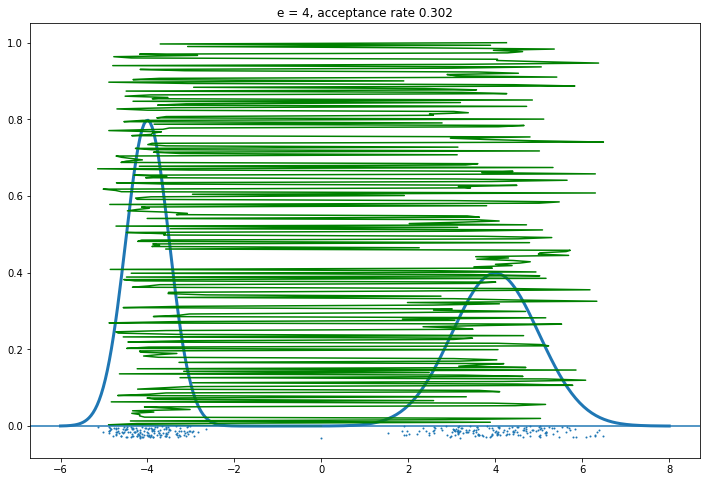

Correlation: 0.018677334339544684


In [153]:
samples = MH_MC_2(0)
y_sam = np.linspace(0,1,len(samples))

plt.figure(figsize=(12,8))
plt.plot(x, y, linewidth=3)
plt.plot(samples, y_sam, color='g')
plt.axhline(y=0)
plt.scatter(samples, [-0.03 * sts.uniform.rvs() for _ in range(len(samples))], s=1)
plt.title('e = 4, acceptance rate {}'.format(float(len(samples)/1000)))
plt.show()
mat = np.concatenate((np.array(samples).reshape(-1,1), np.array(y_sam).reshape(-1,1)), axis=1).T
print('Correlation:', np.cov(mat)[0, 1])